# Behavioral Cloning Project


Behavioral cloning is a method by which human behavioral skills can be captured and reproduced in a computer program.
### Steps Involved in the Behavioral Cloning
***
1. As the human performs the skill, his or her actions are recorded along with the situation that gave rise to the action. 
2. Log of these records is used as an input to a learning program. 
3. The learning program outputs a set of rules that reproduce the skilled behavior.
4. Then These skills will be applied on the target platform to replicate or Outperform the human skills.
***
This method can be used to construct automatic control systems for complex tasks for which classical control theory is inadequate. It can also be used for training.


### Motivation and Background
Behavioral cloning (Michie, Bain, & Hayes-Michie, 1990) is a form of learning by imitationwhose main motivation is to build a model of the behavior of a human when performing a complex skill. Preferably, the model should be in a readable form.

### Below is the architecture used by  Nvidia paper which replicates the current project scenario

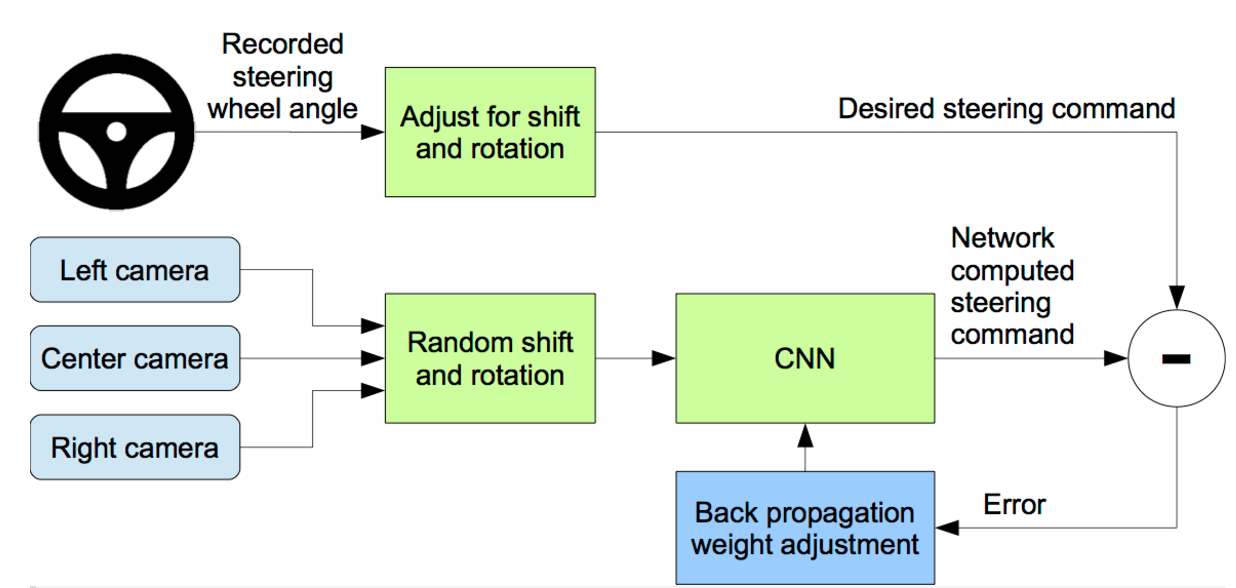

### Import all the necessary libraries

In [46]:
import csv
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Load the data from the CSV file

In this place we will load the data from the csv file using the csv.function available.
After reading the csv file line by line, Create a list to hold the data in the csv file for further processing and utilzation. Read the paths in path_data list and label data like steering wheel angle etc in label_data

In [27]:
path_data = []
label_data=[]
id =1
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        #print(line)
        if id !=1:
            path_data.append(line[0:3])
            label_data.append(line[3:])            
        else:    
            col_labels=line
            id = id+1

In [28]:
#now look at the data read once for verification of reading
print(col_labels)
print(path_data[0])
print(label_data[0])

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg']
[' 0', ' 0', ' 0', ' 22.14829']


In [33]:
#convert the label data to the numpy array to analyse the data statistics
label_data= np.array(label_data,dtype = np.float)
print(type(label_data))
print(label_data[1])

<class 'numpy.ndarray'>
[ 0.       0.       0.      21.87963]


In [44]:
label_data[:,3]

array([22.14829 , 21.87963 ,  1.453011, ...,  1.388364,  1.377208,
        1.374433])

### Analyse the collected data statistics to understand the distribution of each effecting variable of the scenes and driving

#### Steering wheel angle statitics

In [ ]:
#remove the labels from the data loaded for further easy analysis
labels =

(array([6.000e+00, 7.000e+00, 1.010e+02, 3.940e+02, 5.767e+03, 1.405e+03,
        3.040e+02, 4.400e+01, 6.000e+00, 2.000e+00]),
 array([-0.9426954 , -0.74842586, -0.55415632, -0.35988678, -0.16561724,
         0.0286523 ,  0.22292184,  0.41719138,  0.61146092,  0.80573046,
         1.        ]),
 <a list of 10 Patch objects>)

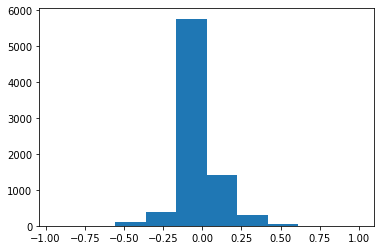

In [45]:
plt.hist(label_data[:,0])

In [ ]:
images = []
measurements = []
for line in lines[1:]:
    curr_path = 'data/'+line[0]
    im = cv2.imread(curr_path)
    images.append(im)
    meas = float(line[3])
    measurements.append(meas)

In [ ]:
x_train = np.array(images)
y_train = np.array(measurements)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (160,320,3)))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mse',optimizer = 'adam')

In [ ]:
model.fit(x_train,y_train,validation_split = 0.2, shuffle = True,nb_epoch =6)
model.save('model.h5')